# EDA DISEASE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Large-data/cardio_train.csv", sep=";")

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
negative, positive = df["cardio"].value_counts()

print(f"Negative for cardiovascular disease: {negative}")
print(f"Positive for cardiovascular disease: {positive}")

Negative for cardiovascular disease: 35021
Positive for cardiovascular disease: 34979


In [6]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

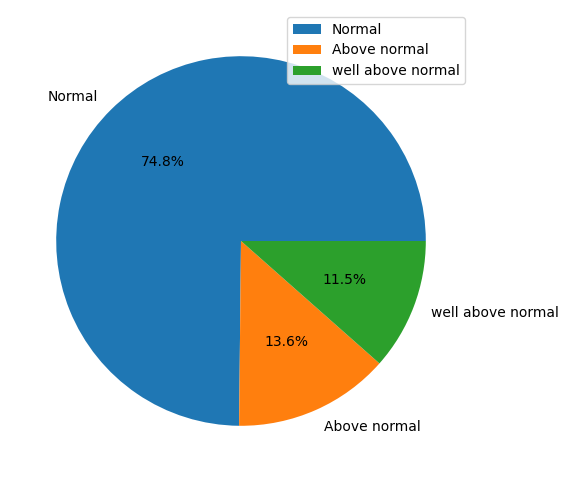

In [7]:
# Piechart for cholesterol levels
fig = plt.subplots(figsize=(10,6))
plt.pie(df["cholesterol"].value_counts(), labels=["Normal", "Above normal", "well above normal"], autopct="%1.1f%%")
plt.legend()

In [8]:
df["age"]

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

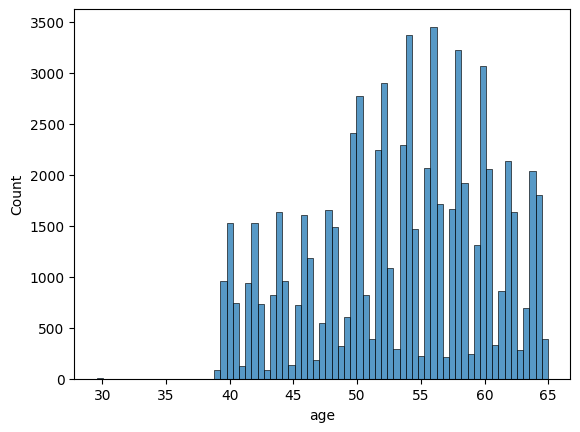

In [9]:
# histplot for age converted to display by year rather than days
sns.histplot(df["age"]/365)

In [10]:
non_smokers, smokers = df["smoke"].value_counts()
smoker_percentage = df["smoke"].mean()

print(f"There are {non_smokers} non smokers and {smokers} smokers")
print(f"{smoker_percentage*100:.2f}% are smokers")

There are 63831 non smokers and 6169 smokers
8.81% are smokers


In [11]:
df["weight"].describe()

count    70000.000000
mean        74.205690
std         14.395757
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

[Text(0.5, 1.0, 'Weight distribution in kg')]

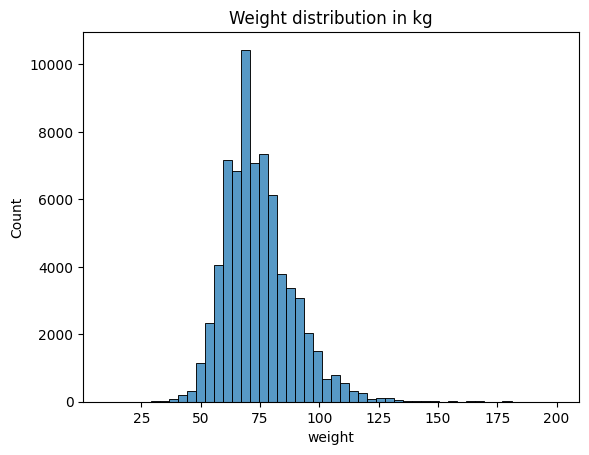

In [12]:
sns.histplot(df["weight"], bins=50).set(title="Weight distribution in kg")

In [13]:
df["height"].describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

[Text(0.5, 1.0, 'Height distribution in cm')]

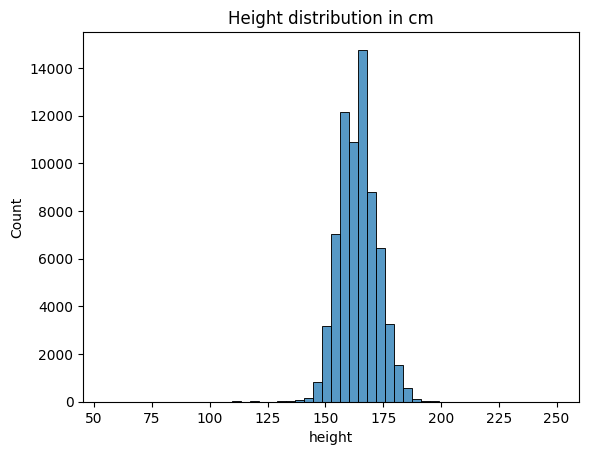

In [14]:
sns.histplot(df["height"], bins=50).set(title="Height distribution in cm")

In [15]:
df_women = df[df["gender"] == 1]
df_men = df[df["gender"] == 2]

df_women

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
df_men

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
11,16,18815,2,173,60.0,120,80,1,1,0,0,1,0
12,18,14791,2,165,60.0,120,80,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1
69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1
69986,99978,18198,2,180,78.0,120,80,1,1,0,0,1,0
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0


[Text(0.5, 1.0, 'Mens cardiovascular disease %')]

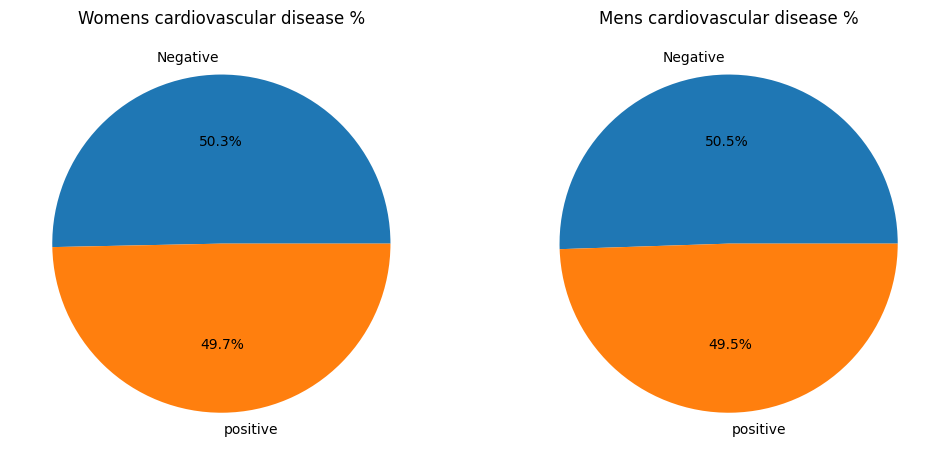

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

ax1.pie(df_women["cardio"].value_counts(), labels=["Negative", "positive"], autopct="%1.1f%%")
ax2.pie(df_men["cardio"].value_counts(), labels=["Negative", "positive"], autopct="%1.1f%%")

ax1.set(title="Womens cardiovascular disease %")
ax2.set(title="Mens cardiovascular disease %")